# Titanic - Machine Learning from Disaster

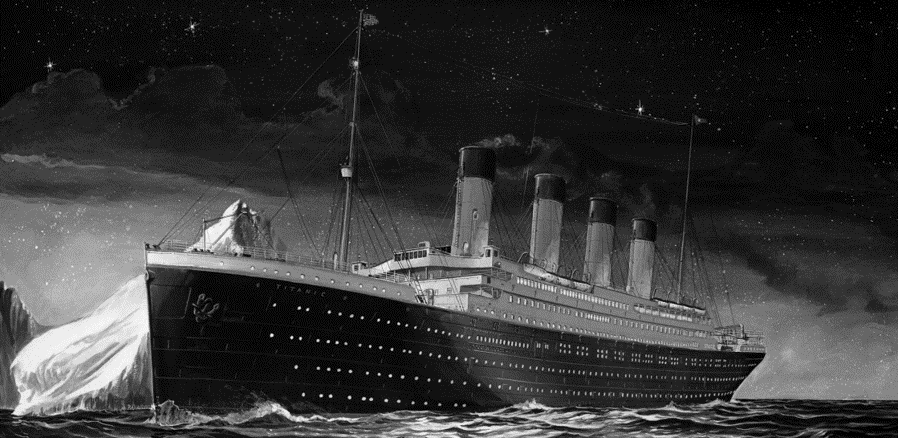

In [1]:
# Import nescessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
# Loading the dataset as dataframe 
df = pd.DataFrame(pd.read_csv('train-Copy1.csv'))
df.head() # view the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape # Shape of the dataframe

(891, 12)

In [4]:
df.size # size of dataframe

10692

## Handling NULL values

In [5]:
# checking for the null values ! 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# columns having null values are :-
#  Age -> 177
#  Cabin -> 687
#  Embarked -> 2

In [7]:
df.dtypes # checking the datatypes of dataframe column values

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Age -> 177 -> float
# Cabin -> 687 -> object(string)
# Embarked -> 2 -> object(string)

In [9]:
# now seperate out the columns which have more than 35% null values ....

In [10]:
x = df.isnull().sum() # null values of columns
drop_col = x[x>(35/100 * df.shape[0])] 
drop_col # columns having null values more than 35% 

Cabin    687
dtype: int64

In [11]:
drop_col.index # index of culumn having null values geater than 35%

Index(['Cabin'], dtype='object')

In [12]:
# dropping / deleting the column having null values greater than 35%
df.drop(drop_col.index, axis=1, inplace=True)
df.isnull().sum() #check for further null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [13]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [14]:
# we had deleted out cabin column 
# now Age column and Embarked column had more null values 

In [15]:
df['Embarked'].describe() # describing the Embarked column 

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [16]:
# check for the unique values
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
# As we can clearly see that the Embarked  column has only 3 unique vales and the highest count
# is of 'S' and it is also the mode of Embarked column ..
df['Embarked'].mode()

0    S
dtype: object

In [18]:
# so we will replace the null values of Embarked with mode i.e 'S' .
df['Embarked'].fillna('S', inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
# Now we only had Age column which had null values so we fill its null values with mean of the age of persons board on the ship.

In [20]:
df['Age'].fillna(df['Age'].mean(), inplace=True) 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
# All null values of dataframe are handled / replaced 
# Cabin -> delete
# Embarked -> mode
# Age -> mean

## correlation between values 

In [22]:
# checking the correrelattion of numerical values  with each other 
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [23]:
# Variable	Definition	Key
# survival	Survival	0 = No, 1 = Yes
# pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
# sex	Sex	
# Age	Age in years	
# sibsp	# of siblings / spouses aboard the Titanic	
# parch	# of parents / children aboard the Titanic	
# ticket	Ticket number	
# fare	Passenger fare	
# cabin	Cabin number	
# embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
# Variable Notes

In [24]:
# correrelation between thw pclass(ticket class ) and fare(passanger fare) is good -> -0.549500
# sibsp and parch -> 0.4140838
# fare and survived -> 0.257307
# fare and parch -> 0.216225 

In [25]:
# maikng the new columns family size from no. of sibling + no. of parents and children
df['Familysize'] = df['SibSp']+df['Parch'] 
# now deleting the columns sibsp and parch 
df.drop(['SibSp','Parch'], axis=1, inplace=True)
# again checking the correrelation for new column i.e familysize
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,Familysize
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
Familysize,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


In [26]:
# pclass and survived also have file relation -> 0.338481

In [27]:
df['Alone'] = [0 if df['Familysize'][i] >0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Familysize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [28]:
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,Familysize,Alone
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997,0.135207
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512,0.179775
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138,-0.271832
Familysize,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000,-0.690922
Alone,0.057462,-0.203367,0.135207,0.179775,-0.271832,-0.690922,1.000000


In [29]:
df.groupby(['Alone'])['Survived'].mean()

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [30]:
# if a person is  not alone then greater chance of living 
# or in others word if a person is alone then it has greater change of die..

## special relation between values 

In [31]:
df[['Alone','Fare']].corr() # if a person is alone then fare is also low .

,Alone,Fare
Alone,1.000000,-0.271832
Fare,-0.271832,1.000000


In [32]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [33]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

# It shows the female passenger had been prioritized 
# pamily person is survived more 
# passenger who was rescued at c [Cherbourg] had more chance of  live or in other words we can say that at Cherbourg most of the people are rescued .